## Exploratory Data Analysis on the Forbes Highest Paid Athletes 1990-2020 Dataset

### Introduction

This dataset provides a list of the world’s top-10 highest-paid athletes since 1990 (when it was first published) up until 2020. This list is calculated based on each athletes’ salary earnings, bonuses, prizes, etc. but does not deduct the athletes’ agents’ fees or taxes. The dataset includes each athletes' name, nationality, current and previous year rank, sport,  year and earnings ($million). 
In 2002, it was decided to change the reporting period to June-to-June instead of the former full calender year which lead to no record for 2001.

Some questions that may come to mind: What nationality makes out most of the data? What sport is most prevalent? What does the earning of each nationality of each sport look like over the 30 years? Which athletes made the most in total earnings over the years? Which athletes made the most total earnings per sport? What is the effect of a rank on an athletes earnings?

This dataset can be found on Kaggle: https://www.kaggle.com/datasets/parulpandey/forbes-highest-paid-athletes-19902019
The data has been extracted from the following website: topendsports.com 

### Data Cleaning

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set color palette
sns.set_palette('Set2')

In [ ]:
# Load data
try:
    df_ath = pd.read_csv(
        "Forbes Richest Athletes 1990-2020.csv"
    )
except FileNotFoundError:
    print(
        "The file: 'Forbes Richest Athletes 1990-2020.csv' does not exist"
    )

In [4]:
# Look at the first 10 rows of data
print("First 10 rows of the dataset.")
df_ath.head(10)

First 10 rows of the dataset.


,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
5,6,Jack Nicklaus,USA,6,NaN,golf,1990,8.6
6,7,Greg Norman,Australia,7,NaN,golf,1990,8.5
7,8,Michael Jordan,USA,8,NaN,basketball,1990,8.1
8,9,Arnold Palmer,USA,8,NaN,golf,1990,8.1
9,10,Evander Holyfield,USA,8,NaN,boxing,1990,8.1


In [5]:
# Look at the shape of the dataset
print("Shape of dataset:")
df_ath.shape

Shape of dataset:


(301, 8)

There are 301 records and 8 columns in this dataset, but could there be duplicates?

In [6]:
# Drop duplicates form dataset
print("Shape of dataset after dropping duplicated:")
df_ath = df_ath.drop_duplicates()
df_ath.shape

Shape of dataset after dropping duplicated:


(301, 8)

The shape stayed the same indicating there were no duplicates. Next, an overview of the dataset.

In [7]:
# Look at an overview of the dataset
print("Quick detailed overview of dataset:")
df_ath.info()

Quick detailed overview of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


As observed, we have:

S.NO (integers) - aid as an ID for each athlete

Name (object/string) - Athlete name

Nationality (object/string) - Althlete nationality

Current Rank (integer) - Rank of the specific year

Rrevious Year Rank (object/string) - Rank of the previous year

Sport (object/string) - Sport the athlete competes in

Year (integer) - Year the record was taken

Earnings in $million (float) - Calculation of each athlete's earnings for that specific year.

Most of the columns seem to have all records except the 'Previous Year Rank' column where there are only 277 values. This indicated missing data.


##### Missing Data

In [8]:
# Look at the number of missing data
print("Indication of number of missing data:")
count_missing = df_ath.isnull().sum()
count_missing

Indication of number of missing data:


S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

There are 24 values missing from the 'Previous Year Rank' column. It is importent to note that the 'Previous Year Rank' column is a string column and therefore takes into account any input, including input such as '>10' and other strings which it does not see as 'missing'. The 24 missing values therefore only represents blank cells. There could be a number of reasons why these are blank. Perhaps an athlete was not on the list the previous year and therefore had no data entry in that specific column. It could be interesting to see how many data is missing per year. 

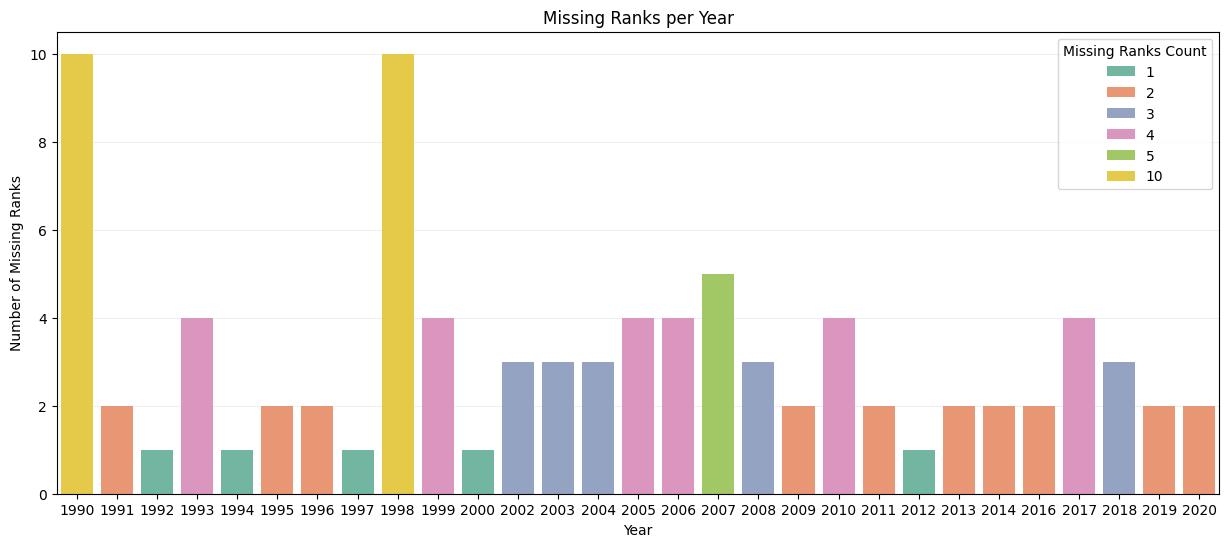

In [9]:
# Convert 'Previous Year Rank' to numeric and all edge
# cases (>10) to NaN
df_ath['Previous Year Rank'] = pd.to_numeric(
    df_ath['Previous Year Rank'], errors='coerce'
)

# Create new dataframe for missing values grouped by the year
missing_ranks_df = (
    df_ath[df_ath['Previous Year Rank'].isna()]
    .groupby('Year')
    .size()  # Count number of missing ranks per year
    .reset_index(name='Missing Ranks Count')  # Converts into dataframe
)

# Visualize the missing ranks per year
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(
    data=missing_ranks_df,
    x='Year',
    y='Missing Ranks Count',
    hue='Missing Ranks Count',
    palette='Set2'
)

# Set grid behind graph
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.2)

# Labels
plt.title('Missing Ranks per Year')
plt.ylabel('Number of Missing Ranks')

plt.show()

The highest counts of missing values are in the years 1990 and 1998. As mentioned before (in the introduction), this list was first established in 1990 which explains why that year does not have any data in the 'Previous Year Rank' column. Also mentioned before, due to the changes in reporting dates, there is no data for 2001. The year 2015 also doen not show. This is because no missing values probably occured in that year. Since the 'Previous Year Rank' column was converted to numeric, this plot also represents any edge values (>10, or other strings) as missing, therefore this plot does not show only 24 values as missing. 

In [10]:
# Since we have the current rankings of each year,
# this column may not be necessary
# Fill the NaN values with None.
df_ath = df_ath.fillna('N/A')
df_ath.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,N/A,boxing,1990,28.6
1,2,Buster Douglas,USA,2,N/A,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,N/A,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,N/A,auto racing,1990,10.0
4,5,Alain Prost,France,5,N/A,auto racing,1990,9.0


Now, let's look at the other columns to see if they need cleaning

##### Further cleaning

The data cleaning process will be done in no particular order. First, strip of unecessary whitespace from string columns.

In [11]:
# Strip exctra whitespace from string columns
strip_columns = ['Name', 'Nationality', 'Sport']
for col in strip_columns:
    df_ath[col] = df_ath[col].str.strip()

In [12]:
# Look at the unique values of the 'Nationality'column
unique_nationality = df_ath['Nationality'].unique()
print(f"Total number of unique nationalities: {len(unique_nationality)}")
unique_nationality

Total number of unique nationalities: 22


array(['USA', 'Brazil', 'France', 'Australia', 'Canada', 'UK', 'Austria',
       'Germany', 'Russia', 'Italy', 'Finland', 'Switzerland',
       'Philippines', 'Portugal', 'Dominican', 'Argentina', 'Filipino',
       'Spain', 'Serbia', 'Northern Ireland', 'Ireland', 'Mexico'],
      dtype=object)

As seen above, there is a nationality called 'Philippines' and one called 'Filipino'. The people of the Philippines are often called Filipinos (source 1). We can thus change the 'Filipino' instances to 'Philippines'. Furthermore, there is 'Northern Ireland' and 'Ireland', but since these two are two distinct jurisdictions (source 2), they will stay as they are. Lastly, the nationality 'Dominican' refers to people from the Dominican Republic (source 3). To keep all entries under the 'Nationality' column stricly as countries (eg. Canada) and not a noun representing a person from a country (eg.  Canadian), we can change 'Dominican' to 'Dominican Republic'.

1. Source: https://www.theguardian.com/notesandqueries/query/0,5753,-2495,00.html#:~:text=SEMANTIC%20ENIGMAS-,The%20people%20of%20the%20Philippines%20are%20called%20Filipinos.,origin%20of%20the%20term%20Filipino.

2. Source:
https://www.theirishroadtrip.com/northern-ireland-vs-ireland/

3. Source:
https://study.com/academy/lesson/dominican-republic-ethnic-groups.html#:~:text=Dominican%20is%20a%20nationality%2C%20referring,or%20white%2C%20or%20another%20race.

In [13]:
# Replace 'Filipino' with 'Philippines'
df_ath['Nationality'] = (
    df_ath['Nationality'].replace('Filipino', 'Philippines')
)
# Replace 'Dominican' with 'Dominican Republic'
df_ath['Nationality'] = (
    df_ath['Nationality'].replace('Dominican', 'Dominican Republic')
)

# Check the uniqueness of 'Nationality' column after replacements
unique_nationality = df_ath['Nationality'].unique()
print(f"Total number of unique nationalities: {len(unique_nationality)}")
unique_nationality

Total number of unique nationalities: 21


array(['USA', 'Brazil', 'France', 'Australia', 'Canada', 'UK', 'Austria',
       'Germany', 'Russia', 'Italy', 'Finland', 'Switzerland',
       'Philippines', 'Portugal', 'Dominican Republic', 'Argentina',
       'Spain', 'Serbia', 'Northern Ireland', 'Ireland', 'Mexico'],
      dtype=object)

Now that the 'Nationality' column is clean, let's look at the 'Sport' column.

In [14]:
# Look at the unique values of the 'Sport' column
unique_sport = df_ath['Sport'].unique()
print(f"Total number of unique sports: {len(unique_sport)}")
unique_sport

Total number of unique sports: 29


array(['boxing', 'auto racing', 'golf', 'basketball', 'Basketball',
       'Boxing', 'Auto Racing', 'Golf', 'Tennis', 'NFL', 'Auto racing',
       'NBA', 'Baseball', 'Ice Hockey', 'American Football / Baseball',
       'tennis', 'ice hockey', 'F1 Motorsports', 'NASCAR', 'Hockey',
       'Auto Racing (Nascar)', 'F1 racing', 'American Football', 'soccer',
       'baseball', 'cycling', 'motorcycle gp', 'Soccer', 'MMA'],
      dtype=object)

As seen above, there are many values that mean the same thing but are simply spelled differently. For example, 'boxing' and 'Boxing' of 'golf' and 'Golf' are the same. Let start by changing every entry so that the first letter of each word starts with a capital letter (this will keep things consistant as with the 'Nationality' column).

In [15]:
# Convert each sport entry to start with a capital letter
df_ath['Sport'] = df_ath['Sport'].str.title()

# Look at the new uniquesness of the sports
unique_sport = df_ath['Sport'].unique()
print(f"Total number of unique sports: {len(unique_sport)}")
unique_sport

Total number of unique sports: 20


array(['Boxing', 'Auto Racing', 'Golf', 'Basketball', 'Tennis', 'Nfl',
       'Nba', 'Baseball', 'Ice Hockey', 'American Football / Baseball',
       'F1 Motorsports', 'Nascar', 'Hockey', 'Auto Racing (Nascar)',
       'F1 Racing', 'American Football', 'Soccer', 'Cycling',
       'Motorcycle Gp', 'Mma'], dtype=object)

That helped by eliminating 9 instances. Furthermore, 'Auto Racing', 'Nascar' and 'Auto Racing (Nascar)' are the same. Also, 'F1 Motorsports' and 'F1 Racing' are the same. The term 'Nfl' stands for 'National Football League' and is therefore the same as 'American Football'. The term 'Nba' stands for 'National Basketball League' and is the same as 'Basketball'. For clarity, 'Mma' can be changed to 'Mixed Martial Arts' and 'Motorcycle Gp' (where the Gp stands for Grand Prix) can be changed to 'Motorcycle GP'. Let's fix theses then take a look at the 'Sport' column again.

In [16]:
# Replace 'Nascar','Autho Racing' and 'Auto Racing (Nascar)' with
# 'NASCAR'
df_ath['Sport'] = (
    df_ath['Sport']
    .replace(['Nascar', 'Auto Racing', 'Auto Racing (Nascar)'], 'NASCAR')
)

# Replace 'F1 Racing' and 'F1 Motorsports' to 'F1'
df_ath['Sport'] = (
    df_ath['Sport']
    .replace(['F1 Racing', 'F1 Motorsports'], 'F1')
)

# Replace 'Nfl' with 'American Football'
df_ath['Sport'] = df_ath['Sport'].replace('Nfl', 'American Football')

# Replace 'Nba' with 'Basketball'
df_ath['Sport'] = df_ath['Sport'].replace('Nba', 'Basketball')

# Replace 'Mma' with 'Mixed Martial Arts'
df_ath['Sport'] = df_ath['Sport'].replace('Mma', 'Mixed Martial Arts')

# Replace 'Motorcycle Gp' with 'Motorcycle GP'
df_ath['Sport'] = df_ath['Sport'].replace('Motorcycle Gp', 'Motorcycle GP')

# Look at the new uniquesness of the sports
unique_sport = df_ath['Sport'].unique()
print(f"Total number of unique sports: {len(unique_sport)}")
unique_sport

Total number of unique sports: 15


array(['Boxing', 'NASCAR', 'Golf', 'Basketball', 'Tennis',
       'American Football', 'Baseball', 'Ice Hockey',
       'American Football / Baseball', 'F1', 'Hockey', 'Soccer',
       'Cycling', 'Motorcycle GP', 'Mixed Martial Arts'], dtype=object)

Almost done. There are entries for 'Ice Hockey' and 'Hockey' and also one for 'American Football / Baseball'. Let's see if we can classify them based on context (who they belong to) since there are different types of hockey and football and baseball is not the same thing.

In [22]:
# Get athletes who have 'Hockey' or 'Ice Hockey' as a sports
hockey_foot_base_ball = (
    df_ath[
        (df_ath['Sport'] == 'Hockey') |
        (df_ath['Sport'] == 'Ice Hockey') |
        (df_ath['Sport'] == 'American Football / Baseball')
    ]
)
print("Clarification on Ice Hockey, Hockey, and American Football / Baseball")
hockey_foot_base_ball

Clarification on Ice Hockey, Hockey, and American Football / Baseball


,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
45,46,Wayne Gretzky,Canada,5,22.0,Ice Hockey,1994,13.5
52,53,Deion Sanders,USA,3,38.0,American Football / Baseball,1995,22.5
59,60,Wayne Gretzky,Canada,10,5.0,Ice Hockey,1995,14.5
78,79,Joe Sakic,Canada,9,N/A,Hockey,1997,17.9
82,83,Sergei Federov,Russia,3,N/A,Ice Hockey,1998,29.8


According to this table, Joe Sakic is the only athlete who listed 'Hockey' as his sport. However, we can confirm that he took part in ice hockey according to Olympic.com (source 1). The word 'Hockey' Can therefore be replaced with 'Ice Hockey' which will also help with clarification.

The only person who listed 'American Football / Baseball' as his sport, is Deion Sanders. He played 14 season in the NFL and 9 seasons in the MBL (Major Baseball League), but his focus was more on football (source 2). We can therefore replace 'American Football / Baseball' with 'American Football'.

1. Source:
https://www.olympics.com/en/athletes/joe-sakic

2. Source:
https://jugssports.com/blog/when-deion-sanders-played-major-league-baseball-and-nfl-football/#:~:text=In%20the%201990s%2C%20however%2C%20Deion%20Sanders%20made,his%20baseball%20career%20and%20had%20more%20highlights.

In [22]:
# Replace 'Hockey' with 'Ice Hockey'
df_ath['Sport'] = df_ath['Sport'].replace('Hockey', 'Ice Hockey')

# Replace 'American Football / Baseball' with 'American Football'
df_ath['Sport'] = (
    df_ath['Sport']
    .replace('American Football / Baseball', 'American Football')
)

# Look at the new uniquesness of the sports
unique_sport = df_ath['Sport'].unique()
print(f"Total number of unique sports: {len(unique_sport)}")
unique_sport

Total number of unique sports: 13


array(['Boxing', 'NASCAR', 'Golf', 'Basketball', 'Tennis',
       'American Football', 'Baseball', 'Ice Hockey', 'F1', 'Soccer',
       'Cycling', 'Motorcycle GP', 'Mixed Martial Arts'], dtype=object)

The 'Sport' column is nou cleaned. We can now take a look at the 'Name' column.

In [23]:
# Look at the unqiueness of the 'Name' column
unique_name = df_ath['Name'].unique()
print(f"Total number of unique names: {len(unique_name)}")
sorted(unique_name)  # Order names A-Z

Total number of unique names: 82


['Aaron Rodgers',
 'Aaron Rogers',
 'Alain Prost',
 'Alex Rodriguez',
 'Andre Agassi',
 'Andrew Luck',
 'Arnold Palmer',
 'Ayrton Senna',
 'Buster Douglas',
 'Cam Newton',
 'Canelo Alvarez',
 'Carson Wentz',
 'Cecil Fielder',
 'Conor McGregor',
 'Cristiano Ronaldo',
 'Dale Earnhardt',
 'Dale Earnhardt Jr.',
 'David Beckham',
 'Deion Sanders',
 'Dennis Rodman',
 'Donovan "Razor" Ruddock',
 'Drew Brees',
 'Eli Manning',
 'Emmit Smith',
 'Evander Holyfield',
 'Floyd Mayweather',
 'Gary Sheffield',
 'George Foreman',
 'Gerhard Berger',
 'Grant Hill',
 'Greg Norman',
 'Jack Nicklaus',
 'Jacques Villeneuve',
 'James Harden',
 'Jeff Gordon',
 'Jim Courier',
 'Joe Montana',
 'Joe Sakic',
 'Jordan Spieth',
 'Kevin Durant',
 'Kevin Garnett',
 'Kimi Raikkonen',
 'Kirk Cousins',
 'Kobe Bryant',
 'Lance Armstrong',
 'LeBron James',
 'Lennox Lewis',
 'Lewis Hamilton',
 'Lionel Messi',
 'Manny Pacquiao',
 'Matt Ryan',
 'Matthew Stafford',
 'Michael Jordan',
 'Michael Moorer',
 'Michael Schumacher',
 

By going through these names, we can assume that the firsts two (Aaron Rodgers and Aaron Rogers) are the same person and  that 'Shaq O'Neal' and 'Shaquille O'Neal' are the same person.

In [24]:
# Replace 'Aaron Rogers' with 'Aaron Rodgers'
df_ath['Name'] = df_ath['Name'].replace('Aaron Rogers', 'Aaron Rodgers')

# Replace 'Shaq O'Neal' with 'Shaquille O'Neal'
df_ath['Name'] = df_ath['Name'].replace("Shaq O'Neal", "Shaquille O'Neal")

# Look at the unqiueness of the 'Name' column
unique_name = df_ath['Name'].unique()
print(f"Total number of unique names: {len(unique_name)}")
sorted(unique_name)

Total number of unique names: 80


['Aaron Rodgers',
 'Alain Prost',
 'Alex Rodriguez',
 'Andre Agassi',
 'Andrew Luck',
 'Arnold Palmer',
 'Ayrton Senna',
 'Buster Douglas',
 'Cam Newton',
 'Canelo Alvarez',
 'Carson Wentz',
 'Cecil Fielder',
 'Conor McGregor',
 'Cristiano Ronaldo',
 'Dale Earnhardt',
 'Dale Earnhardt Jr.',
 'David Beckham',
 'Deion Sanders',
 'Dennis Rodman',
 'Donovan "Razor" Ruddock',
 'Drew Brees',
 'Eli Manning',
 'Emmit Smith',
 'Evander Holyfield',
 'Floyd Mayweather',
 'Gary Sheffield',
 'George Foreman',
 'Gerhard Berger',
 'Grant Hill',
 'Greg Norman',
 'Jack Nicklaus',
 'Jacques Villeneuve',
 'James Harden',
 'Jeff Gordon',
 'Jim Courier',
 'Joe Montana',
 'Joe Sakic',
 'Jordan Spieth',
 'Kevin Durant',
 'Kevin Garnett',
 'Kimi Raikkonen',
 'Kirk Cousins',
 'Kobe Bryant',
 'Lance Armstrong',
 'LeBron James',
 'Lennox Lewis',
 'Lewis Hamilton',
 'Lionel Messi',
 'Manny Pacquiao',
 'Matt Ryan',
 'Matthew Stafford',
 'Michael Jordan',
 'Michael Moorer',
 'Michael Schumacher',
 'Michael Vick',
 

All the columns are now cleaned and ready to be explored.

### Exploratory Data Analysis

#### Data Stories and Visualizations

Now that the data is cleaned, let's have a look at the cleaned dataset.


In [25]:
# Review first 10 rows of data
print("First 10 rows of data:")
df_ath.head(10)

First 10 rows of data:


,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,N/A,Boxing,1990,28.6
1,2,Buster Douglas,USA,2,N/A,Boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,N/A,Boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,N/A,NASCAR,1990,10.0
4,5,Alain Prost,France,5,N/A,NASCAR,1990,9.0
5,6,Jack Nicklaus,USA,6,N/A,Golf,1990,8.6
6,7,Greg Norman,Australia,7,N/A,Golf,1990,8.5
7,8,Michael Jordan,USA,8,N/A,Basketball,1990,8.1
8,9,Arnold Palmer,USA,8,N/A,Golf,1990,8.1
9,10,Evander Holyfield,USA,8,N/A,Boxing,1990,8.1


First, let's see for how much of the data does each nationality acount forin this dataset. In other words, which nationlity appears the most on the list?

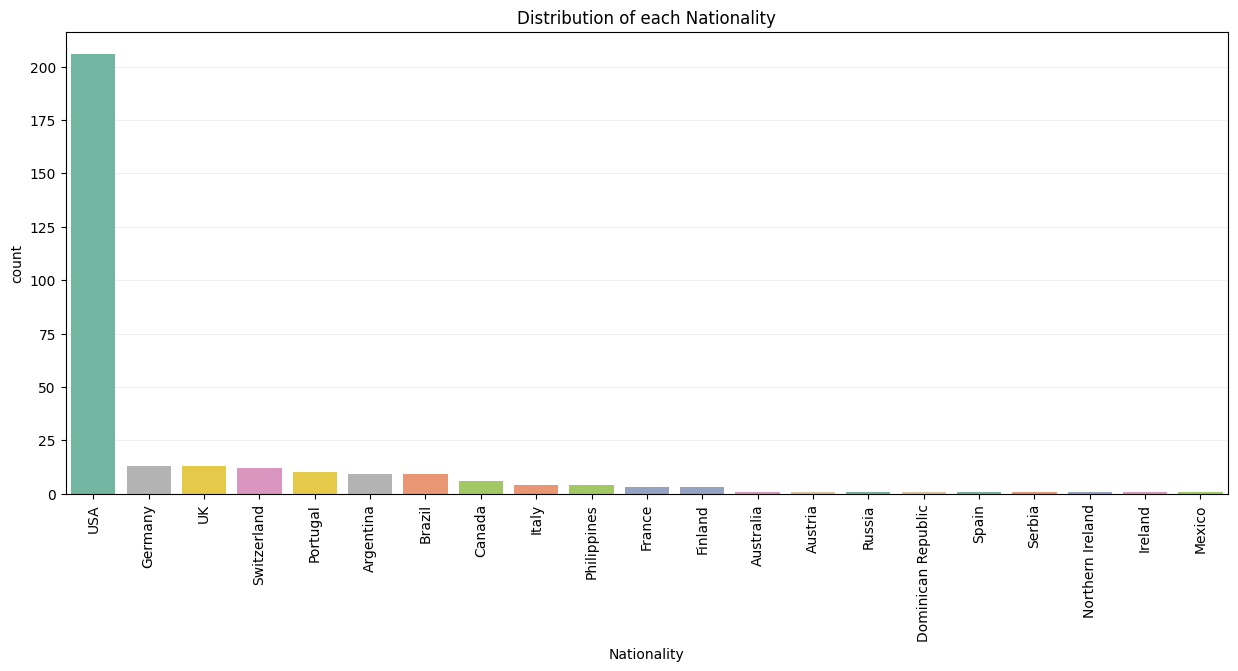

In [51]:
# How much of each nationality is in this dataset
fig, ax = plt.subplots(figsize=(15, 6))
sns.countplot(
    data=df_ath,
    x='Nationality',
    order=df_ath['Nationality'].value_counts().index,  # Sort desccending
    hue='Nationality',
    palette='Set2'
)

# Set grid behind graph
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.2)

# Labels
plt.title('Distribution of each Nationality')
plt.xticks(rotation=90)

plt.show()

As seen above, USA is cleary taking the lead on having the most athletes on the list followed by Germany and the the UK. Let's get a clearer view of what percentage the top 10 countries make out in this dataset.

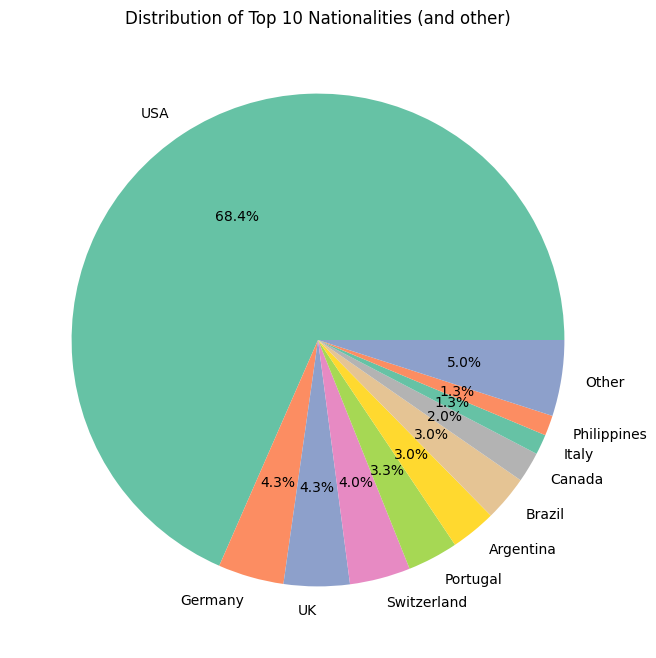

In [29]:
# Get count of the nationalities
count_nat = df_ath['Nationality'].value_counts()

# Get top 10 counts and combine the rest
top_nat = count_nat[:10]
rest_nat = count_nat[10:].sum()

# Create a new table with only the data needed for the chart
pie_data = top_nat.copy()
pie_data['Other'] = rest_nat  # Creates column for the rest

# Distribution of top 10 nationalities
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(x=pie_data, labels=pie_data.index, autopct='%1.1f%%')

plt.title("Distribution of Top 10 Nationalities (and other)")
plt.show()

Of the whole dataset, 68.4% is made out of the USA. That is 15 times more than the nationality that it next in line. Germany and the UK makes out 4.3% each.

Let's see which sport is most prevalent in this dataset.

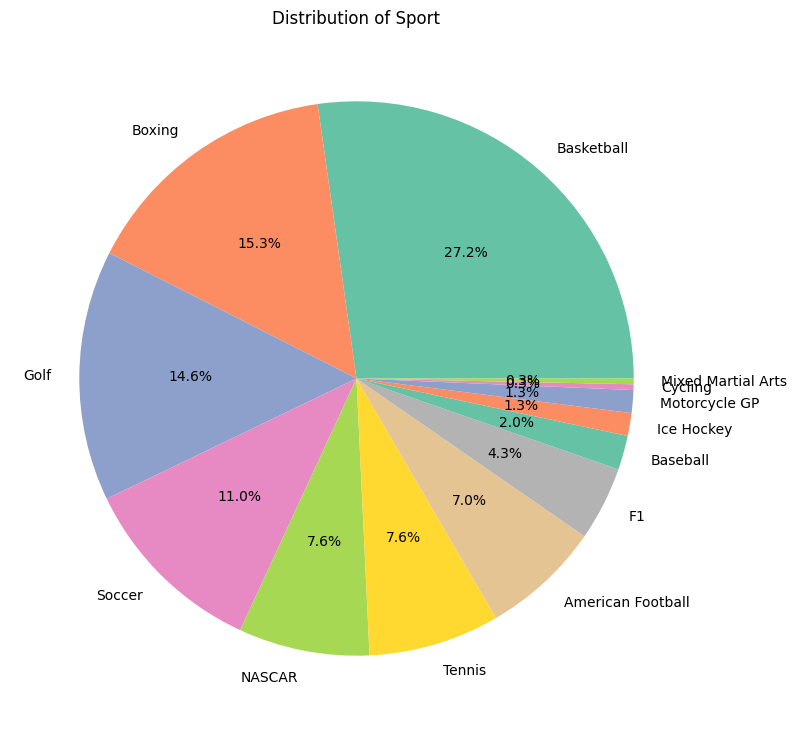

In [30]:
# Get a count of the sports
count_sport = df_ath['Sport'].value_counts()

# Distribution of sports accross dataset
fig, ax = plt.subplots(figsize=(9, 9))
ax.pie(x=count_sport, labels=count_sport.index, autopct='%1.1f%%')

plt.title('Distribution of Sport')
plt.show()

Most athletes in this dataset were basketball players as they account for 27.2% of the records. This is followed by boxing (15.3%) and golf (14.6%). Some of the least prevalent sports were mixed martial arts (0.3%) and cycle (0.3%). This could be because bicycle prices are extremely high, cyclist worry about traffic safety (especially in cities) and cycling paths may be far from were the athletes live (source 1). Mixed Martial Arts is an extremely dangerous full-contact body sport that involves brutal fights (source 2) which may be offputting to most people.

1. Source:
https://pmc.ncbi.nlm.nih.gov/articles/PMC10546027/#s6

2. Source:
https://www.genre.com/us/knowledge/publications/2019/april/mixed-martial-arts-a-controversial-combat-sport-en

Let's take a look at the distribtuion of sports for the top 5 nationalities. From this we will be able to see which country had the most basketball players, which country had the most boxers, etc.

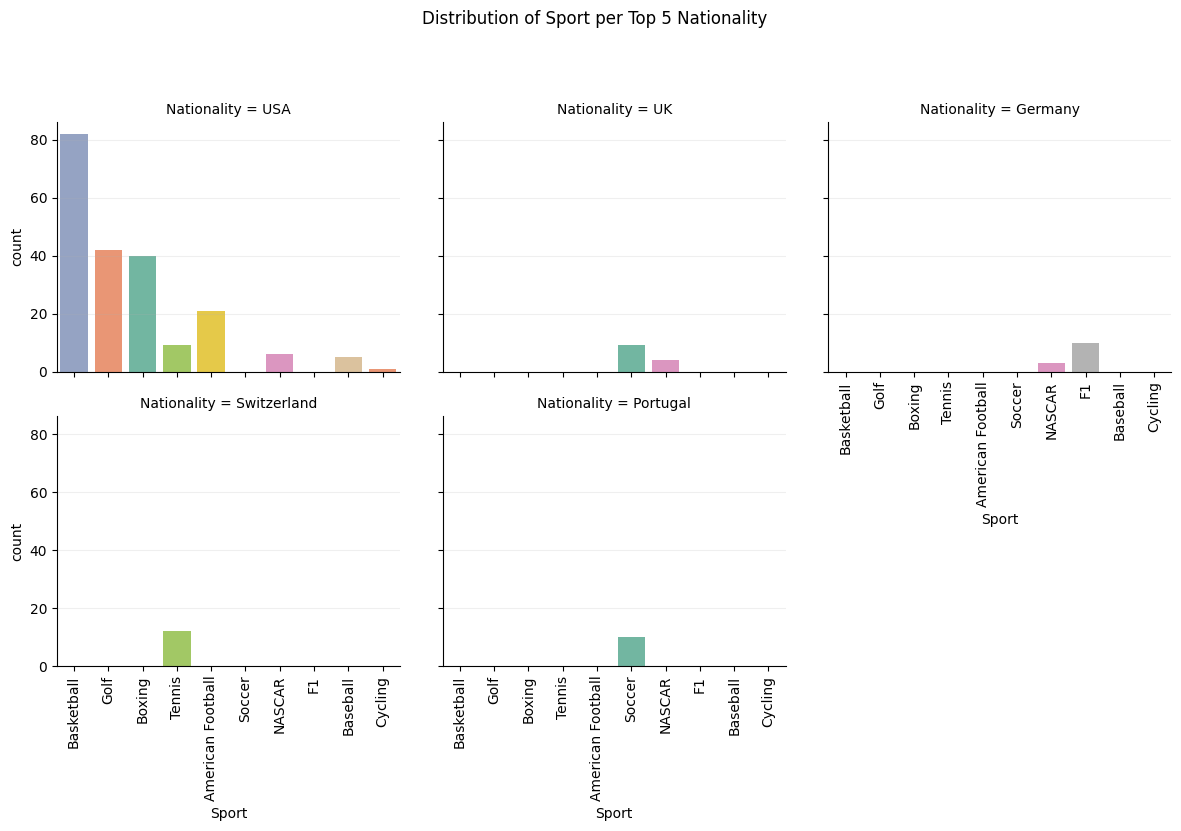

In [31]:
# Get a count of the nationalities and extract the top 5
top_nat = df_ath['Nationality'].value_counts().head(5).index

# Filter the rest of database for record belonging to the top
# 4 nationalities
grid_nat = df_ath[df_ath['Nationality'].isin(top_nat)]

# Distribute sport per nationality
fg = sns.FacetGrid(
    data=grid_nat,
    col='Nationality',
    col_wrap=3,  # Three nationalities per row
    height=4,
    hue='Sport',
    palette='Set2'
)
fg.map_dataframe(
    sns.countplot,
    x='Sport',
    order=grid_nat['Sport'].value_counts().index
)

# Labels
fg.fig.suptitle('Distribution of Sport per Top 5 Nationality', y=1.02)
for ax in fg.axes.flatten():  # Flattens grid into 1D list to loop through
    plt.setp(ax.get_xticklabels(), rotation=90)
    ax.grid(axis='y', alpha=0.2)
plt.subplots_adjust(top=0.88, bottom=0.2)

plt.show()

In the USA, Bascketball is the most popular sport on the list, followed by golf and boxing. The USA appear to have a bit of every sport on the list except soccer and F1. The only sports on the list by athletes from the UK is Socccer and NASCAR and for Germany it's NASCAR and F1. The only Switzerland athletes on the list are those who play tennis and for Portugal it's the athletes who compete in Soccer.

Since the USA accounts for most of this dataset's records, it is also probable that most of the earnings belong to the USA. What does each nationality's total earnings look like from 1990-2020? We will first look at all the nationalities and then the top 10 since the visuals for 21 nationalities in total may not be too clear.

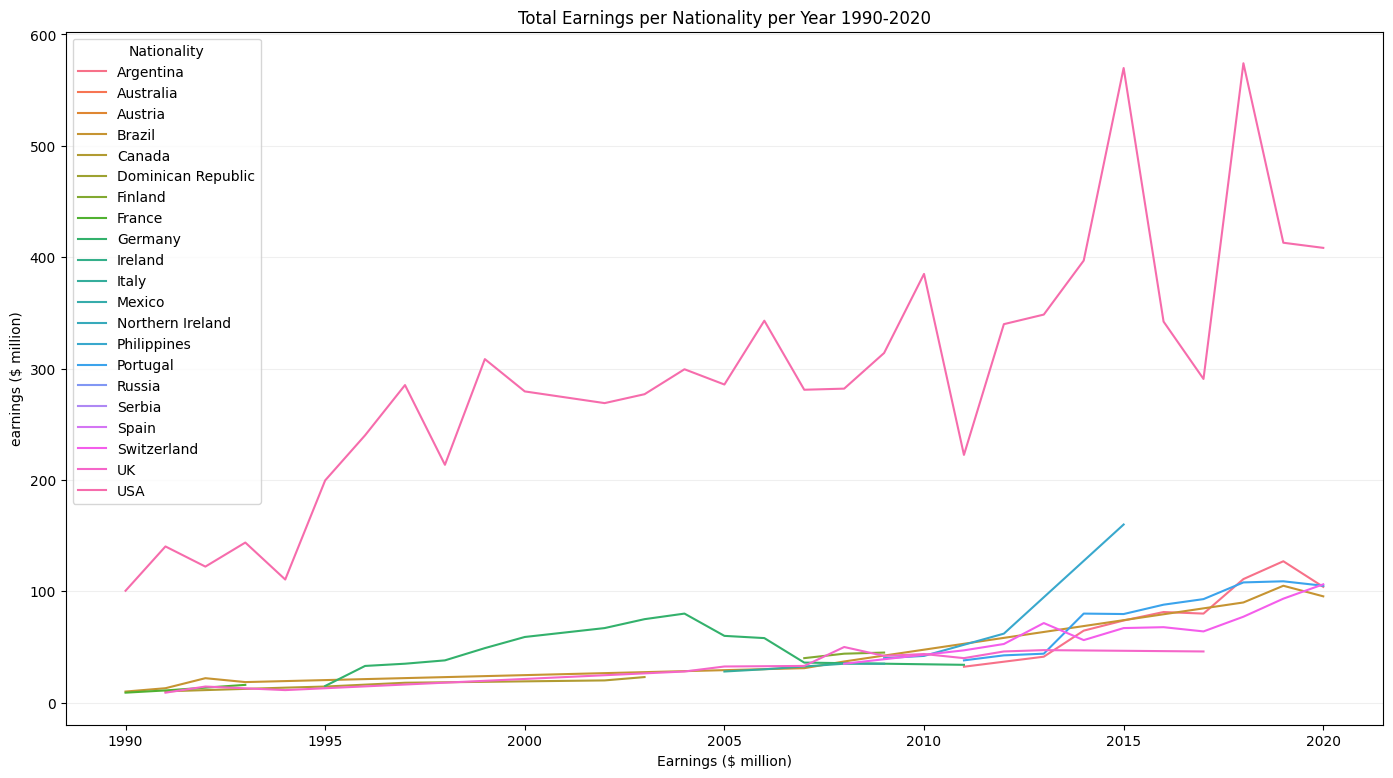

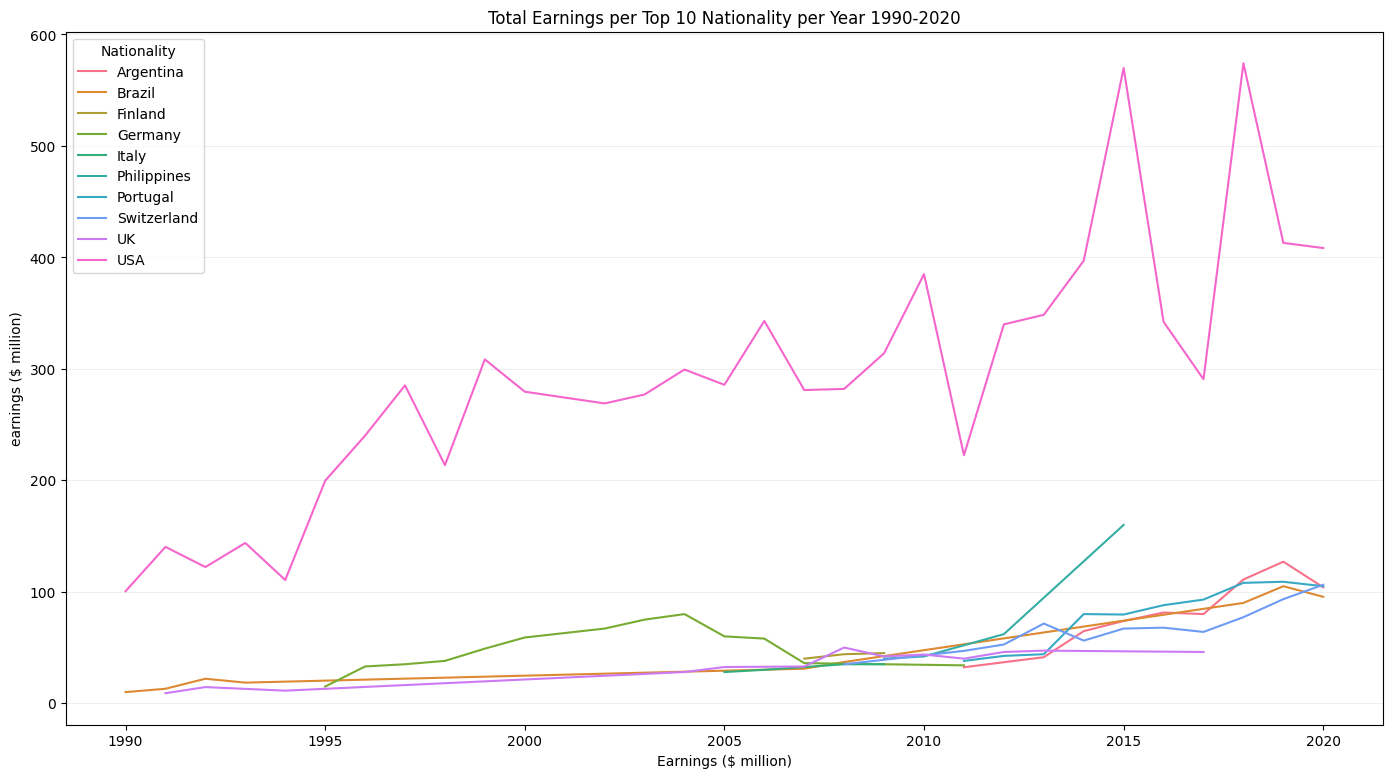

In [47]:
# Group by nationalities and years then get total earnings
# per natinality per year.
grouped_nat = (
    df_ath.groupby(['Nationality', 'Year'])['earnings ($ million)']
    .sum()
    .reset_index()
)

# Total earnings for all nationalities
fig, ax = plt.subplots(figsize=(17, 9))
sns.lineplot(
    data=grouped_nat,
    x='Year',
    y='earnings ($ million)',
    hue='Nationality',
    errorbar=None
)
plt.title('Total Earnings per Nationality per Year 1990-2020')
plt.xlabel('Earnings ($ million)')

# Set grid behind graph
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.2)

# Get top 10 earning nationalities
# Group by nationalities and calculate total earnings per nationality
top_10_nat = (
    df_ath.groupby('Nationality')['earnings ($ million)']
    .sum()
    .nlargest(10)  # Select largest 10 based on earnings
    .index
)

# Filter rest of dataset for only athletes from top 10 nationalities
grouped_top_10_nat = (
    grouped_nat[
        grouped_nat['Nationality'].isin(top_10_nat)
    ]
)

# Total earnings for top 10 nationalities
fig, ax = plt.subplots(figsize=(17, 9))
sns.lineplot(
    data=grouped_top_10_nat,
    x='Year',
    y='earnings ($ million)',
    hue='Nationality',
    errorbar=None
)
plt.title('Total Earnings per Top 10 Nationality per Year 1990-2020')
plt.xlabel('Earnings ($ million)')

# Set grid behind graph
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.2)

plt.show()

As seen on both graphs above, it can be confirmed that the USA consistently had the most earnings over the years. There were noticeable spikes and drops. This could be due to years where there were more athletes of the USA on that year's list which could add to their earnings or a particular sport were more popular of less popular in that year. The earnings for the USA are increasing overall over the years. Its top years were 2015 and 2018.

In the top graph we can see that most of the countries start low and also stay low until approximately 2010 when they steadily start increasing. This could be due to an increase in sport popularity or just certain athletes who started earning more.
There are also breaks in some of the lines. For example, the line for France only spans from 1990 to 1993 because those were the only years athletes from France made the list.  Similarly, the line for Finland only spads from 2007 to 2009.

In the bottom graph we get a better look at the top ten countries. The athletes from Germany first appears on the list in 1995. Their earnings grew steeper over the years until 2004 after which it steadily decreased.
The Philippines first appeared on the list in 2009. Their earnings sharply increased from 2013 op until 2015 after which they did not appear again.

Next, we look at each sport's earnings.

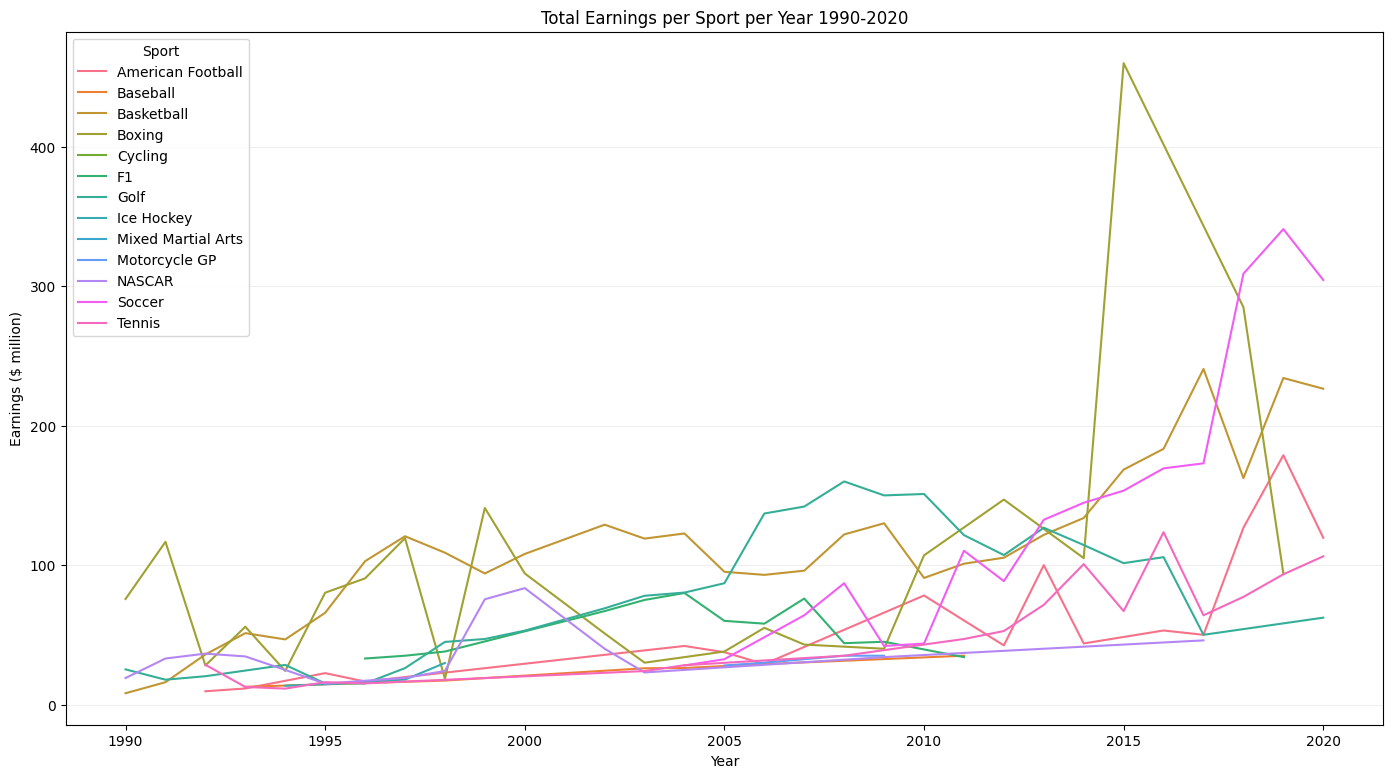

In [50]:
# Group by sport and year and get the total earnings
grouped_sp = (
    df_ath.groupby(['Sport', 'Year'])['earnings ($ million)']
    .sum()
    .reset_index()
)

# Earnings per sport
fig, ax = plt.subplots(figsize=(17, 9))
sns.lineplot(
    data=grouped_sp,
    x='Year',
    y='earnings ($ million)',
    hue='Sport'
)
plt.title('Total Earnings per Sport per Year 1990-2020')
plt.ylabel('Earnings ($ million)')

# Set grid behind graph
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.2)

plt.show()


There is variation in the total earnings for all sports. Overall, the lines for al sports are increasing slightly meaning that they are making more in the later years than they were in the earlier years. 
In 2015, boxing had its peak and earned more than all the other sports (over 400 million dollars), which could mean there were some big or popular fights. According to Sky Sports, it was the year Floyd Mayweather Jr finally went up against Manny Pacquiao (source 1). Boxing's earnings then dropped steeply until 2019 after which it did not appear on the list again. Perhaps that drop in earnings had somethings to do with Floyd Mayweather's retirement in 2017 (source 2).
Soccer started low, but saw a steep rise after 2010 and peaked in 2019. A reason for this could be that the FIFA World Cup was held in 2010 and for the first time ever on an African Continent. This was seen by many as a gesture of growth of the sport as well as the global reach that it has (source 3).
Basketball shows consistantly rising earnings with a peak in 2017 and then a sharp drop in 2018. The rise can be explained by a masive surge in popularity of this sport in 2017 due to increased NBA ratings across multiple television sport networks and it was the NBA's highest-rated season in five years (source 4).
Golf earnings started low in 1990 but started increasing around 1997 and were at its highest in 2008 possibly due to the popularity of Tiger Woods (source 5). After that it started decreasing again. 

1. Source:
https://www.skysports.com/boxing/news/12184/10102528/fights-of-the-year-2015-was-a-stellar-year-for-boxing-but-what-stood-out

2. Source:
https://www.nbc.com/nbc-insider/floyd-mayweather-jr-thinks-olympics-defeat-helped-career

3. Source:
https://medium.com/@numanaslam330/fifa-world-cup-2010-a-tournament-that-shaped-history-ba768a3f21f9

4. Source:
https://www.forbes.com/sites/bradadgate/2018/04/25/the-2017-18-season-was-great-for-the-nba/

5. Source:
https://www.businessinsider.com/tiger-woods-era-doubled-pga-tour-prize-money-2014-12

Let's look at the athletes. Who was the number one ranking athlete in each year? Did some of them appear more than once? 

In [36]:
# Number 1 rannking athlete in each year.
print("Top Athlete per Year 1990-2020")
num_1 = df_ath[df_ath['Current Rank'] == 1]
num_1

Top Athlete per Year 1990-2020


,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,N/A,Boxing,1990,28.6
10,11,Evander Holyfield,USA,1,8.0,Boxing,1991,60.5
20,21,Michael Jordan,USA,1,3.0,Basketball,1992,35.9
30,31,Michael Jordan,USA,1,1.0,Basketball,1993,36.0
40,41,Michael Jordan,USA,1,1.0,Basketball,1994,30.0
50,51,Michael Jordan,USA,1,1.0,Basketball,1995,43.9
60,61,Mike Tyson,USA,1,2.0,Boxing,1996,75.0
70,71,Michael Jordan,USA,1,2.0,Basketball,1997,78.3
80,81,Michael Jordan,USA,1,N/A,Basketball,1998,69.0
90,91,Michael Schumacher,Germany,1,2.0,NASCAR,1999,49.0


The very first thing that stands out in this list, is the number of consecutive times Tiger Woods’ name appears on this list (2002-2011) and then again in 2013. According to Business Inside, this timeline fall right inside the "Tiger Era" (source 1). Interestingly, this era started in 1997 (the last year he was an amateur) and is also the year that golf earnings started to rise (see plot above). Tiger Woods' streak was only broken by Floyd Mayweather in 2012. The majority of the names on this list appeared more than once with Evander Holyfield (1991) and Lionel Messi (2019) being the exceptions as well as Roger Federer (2020) although judging off of wat he made, it may onle have been the beginning.

1. Source:
https://www.businessinsider.com/tiger-woods-era-doubled-pga-tour-prize-money-2014-12

To carry on this topic of 'number of appearances', we can ask the following: Which athletes' names appeared on the list the most?

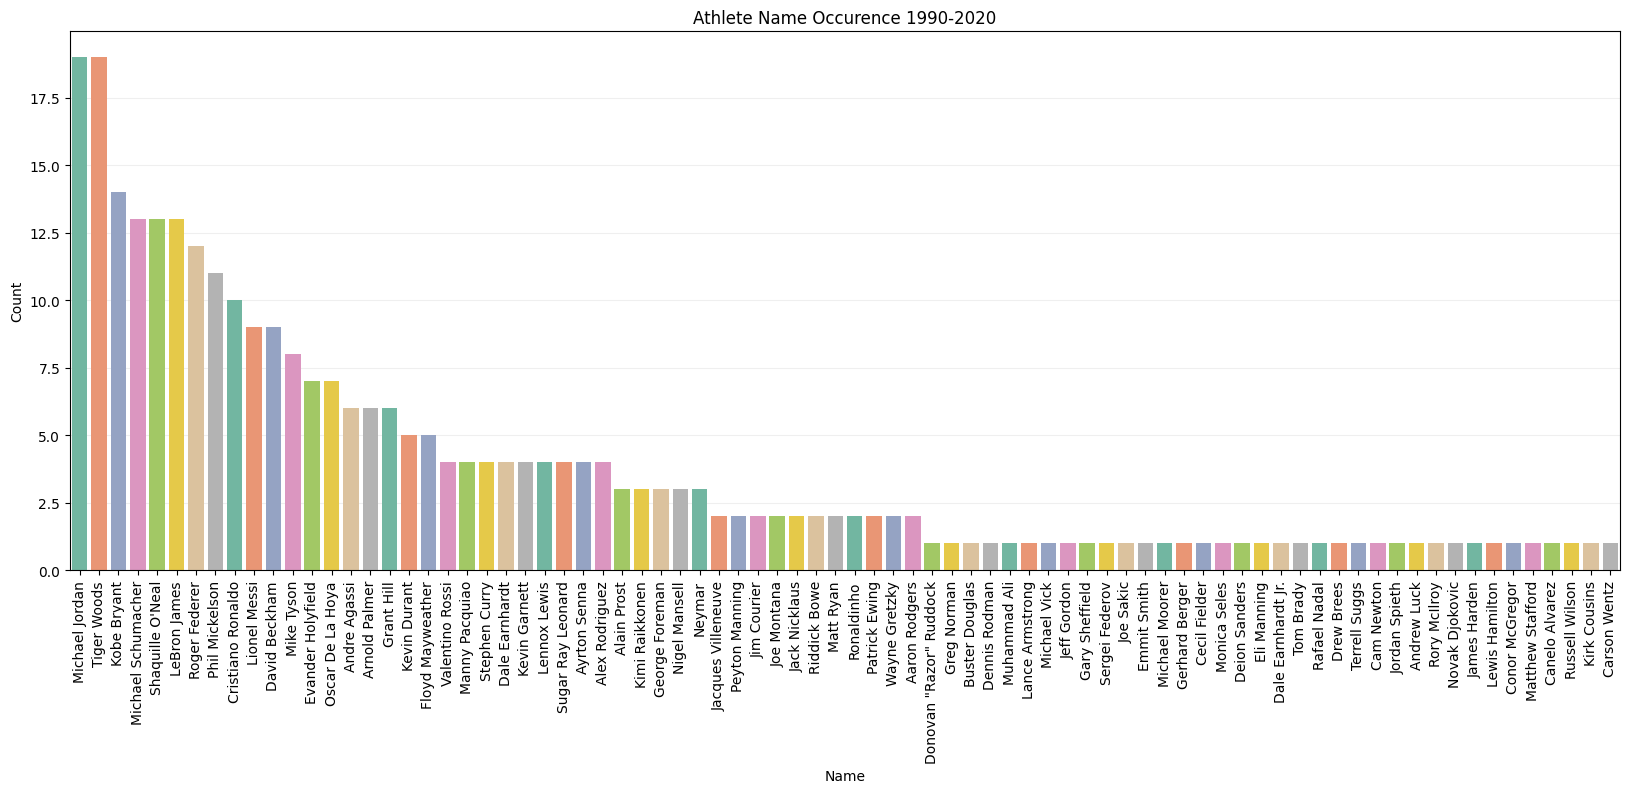

In [38]:
# Get a count of the athletes names and rename columns for clarity
count_name = df_ath['Name'].value_counts().reset_index()
count_name.columns = ['Name', 'Count']

# Create a dataframe copy to modify if needed
count_ath = count_name.copy()

# Occurence of athlete names
fig, ax = plt.subplots(figsize=(20, 7))
sns.barplot(data=count_ath, x='Name', y='Count', hue='Name', palette='Set2')

# Set grid behinf graph
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.2)

# Labels
plt.xticks(rotation=90)
plt.title('Athlete Name Occurence 1990-2020')

plt.show()

The names that appear the most on the top ten list accross the 30 years are Michael Jordan and Tiger Woods who's names appear 19 times followed by Kobe Bryant (14 times), Michael Schumacher, Shaquille O'Neal and LeBron James who each appeared 13 times. The majority of the athletes made the list at least two times or more, but approximately 36 athletes only made the list once.

Does the fact that Michael Jordan, Tiger Woods and some of the other athletes who made the list multiple times also mean their earnings are the most? Will athletes of the sports that make up most of the dataset's records appear on the top 10 list of earners across the 30 years?

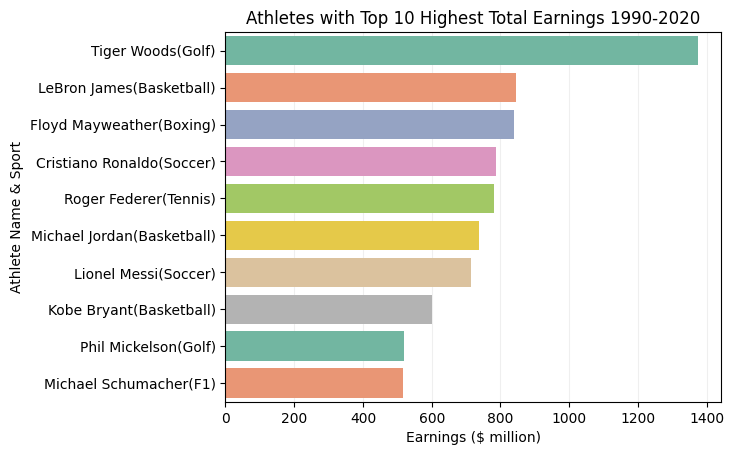

In [39]:
# Group by name and sport then calculate total earnings
group_earn = (
    df_ath.groupby(['Name', 'Sport'])['earnings ($ million)']
    .sum()
    .reset_index()
)

# Get the top 10 athletes based on earnings
top_earn = group_earn.nlargest(10, 'earnings ($ million)')
top_earn['Name & Sport'] = top_earn['Name'] + '('+top_earn['Sport']+')'

# Top 10 earning athletes
fig, ax = plt.subplots()
sns.barplot(
    data=top_earn,
    y='Name & Sport',
    x='earnings ($ million)',
    hue='Name & Sport',
    palette='Set2'
)

# Set grid behind graph
ax.set_axisbelow(True)
ax.grid(axis='x', alpha=0.2)

# Labels
plt.title('Athletes with Top 10 Highest Total Earnings 1990-2020')
plt.ylabel('Athlete Name & Sport')
plt.xlabel('Earnings ($ million)')

plt.show()

Across all 30 years, Tiger Woods by far made the most out of all the athletes as expected since his name occurs on the list more than half the years. Michael Jordan's name also appeared as much as Tiger Woods', but he made alot less. This could be due to the difference in earnings in what each sport makes. 

On this list of top 10 earning athletes, there are 3 that played basketball (LeBron James, Michael Jordan and Kobe Bryant), which makes sence as basketball made out 27.2% of the records in this dataset and these three athletes also appeared on the previous graph of names that appeared the most. 
Boxing made out 15.3% of the dataset, but there is only one boxer (Floyed Mayweather) on this list and according to the previous graph, his name only appeared 5 times accross the 30 years. This would mean that during the 5 years that he competed, his earnings was enough to land him 3rd place on the top 10 highest earners list across the 30 years.
Golf made out 14.6% of the dataset and there are two golf players on thos list. One of which, Phil Mickelson, who's name appeared 11 times across the 30 years.

Overall most of the athletes who's names appeared the most according to the previous graph, also appear to be the highest earners over the 30 years and most of sports that made out most of the dataset also apear at least twice this top 10 list.

After looking at this graph, it would be interesting to know who are the top 5 earning athletes per sport. We can expect to se the names above in each sport, but who else?

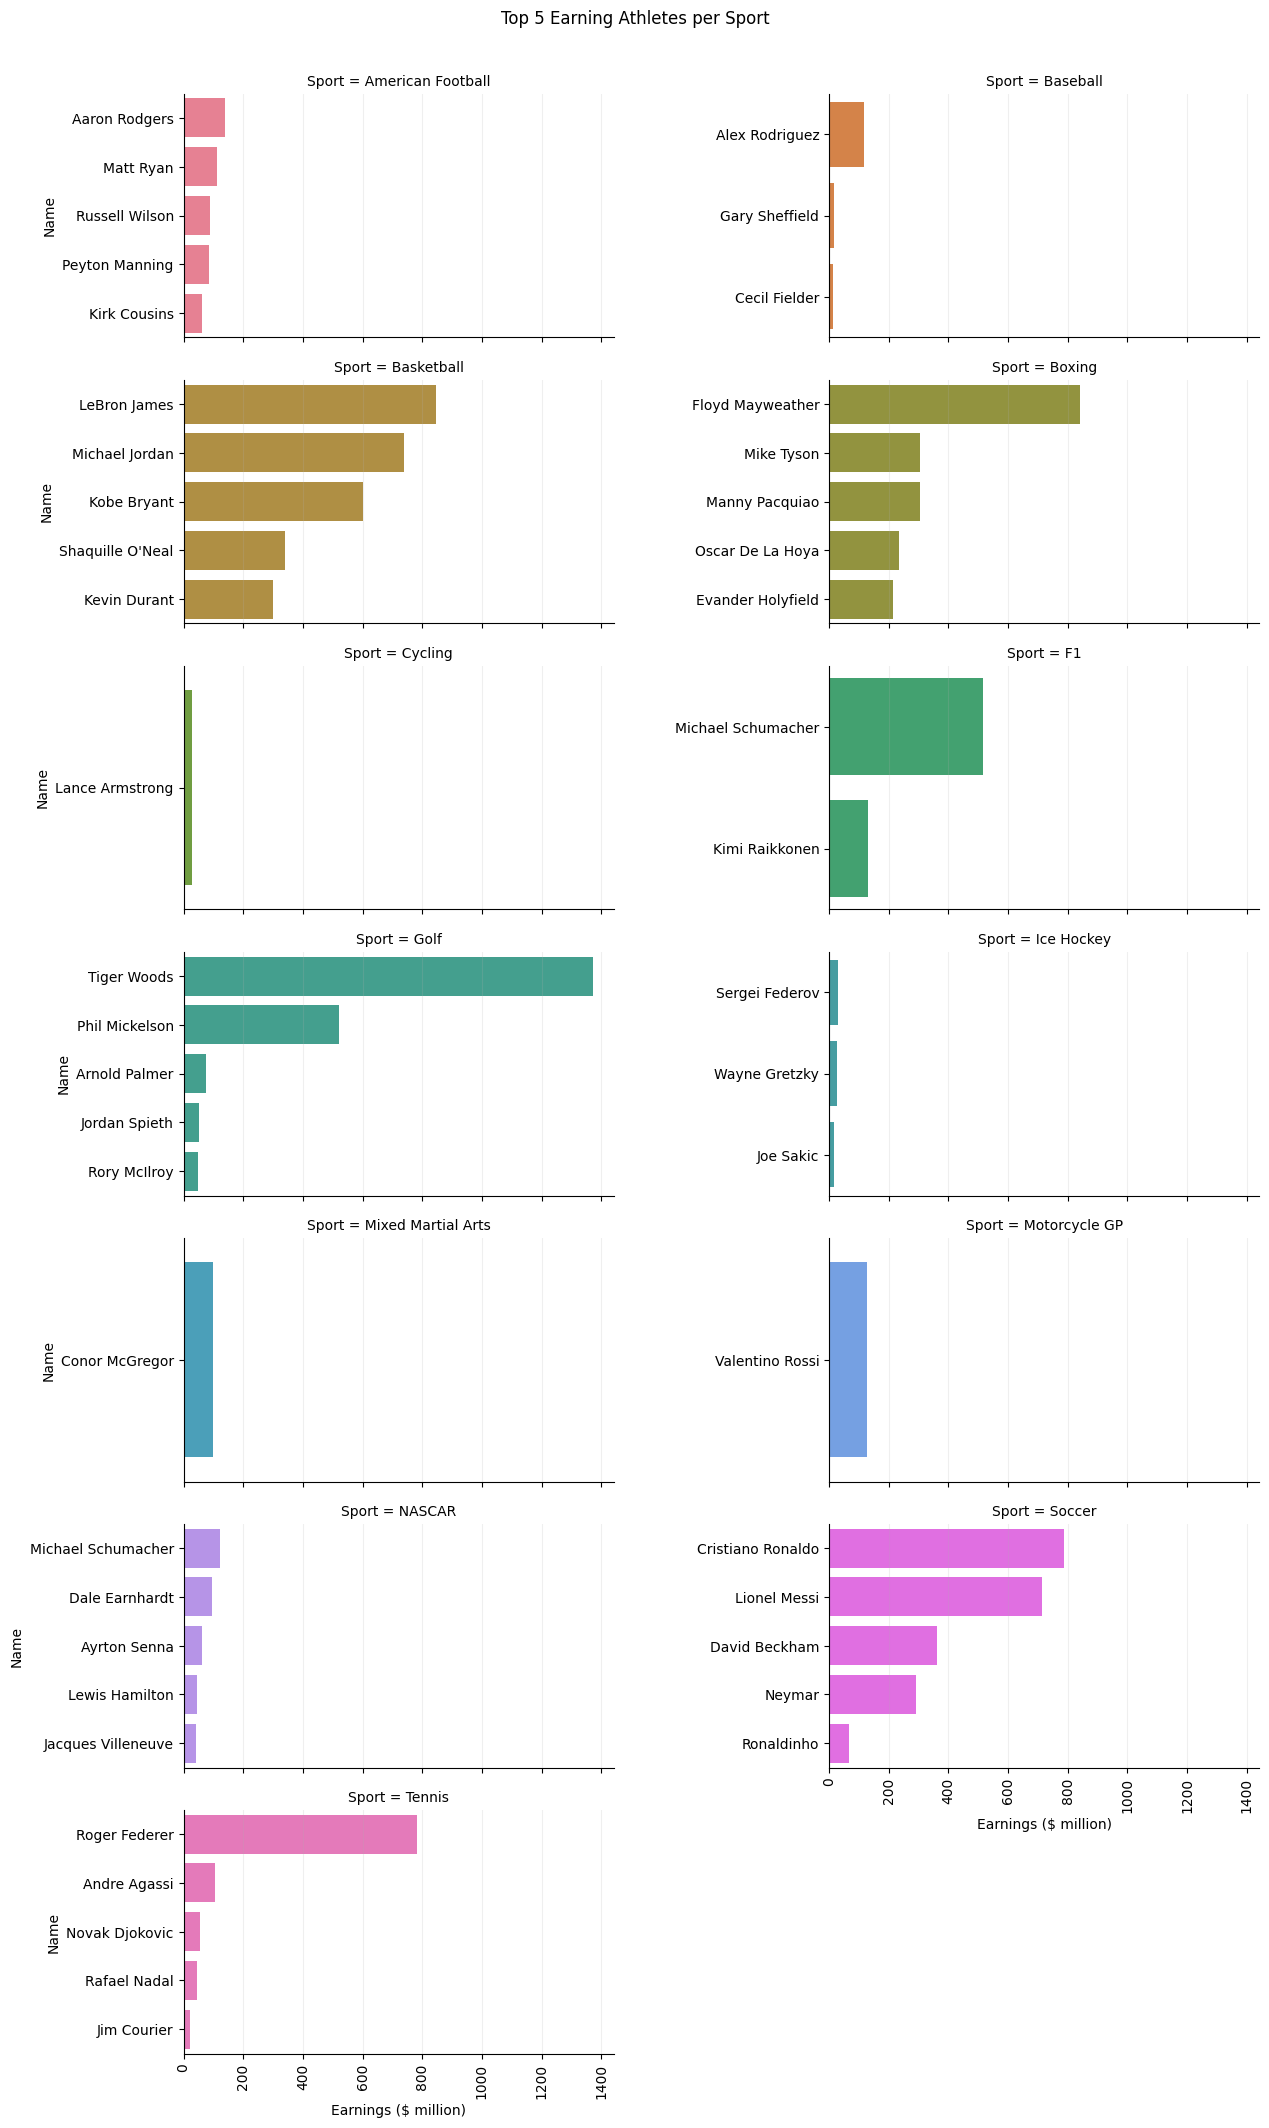

In [45]:
# Group by Name and Sport and calculate earnings
grouped_ath_sp = (
    df_ath.groupby(['Sport', 'Name'])['earnings ($ million)']
    .sum()
    .reset_index()
)

# To supress future warning
with warnings.catch_warnings():
    warnings.simplefilter('ignore', FutureWarning)

    # Group the group_ath_sp dataframe by sport and find the top
    # 5 earners for each sport
    top_sp_earn = (
        grouped_ath_sp.groupby('Sport', group_keys=False)
        .apply(lambda x: x.nlargest(5, 'earnings ($ million)'))
    )

# Top 5 earners per sport
fg = sns.FacetGrid(
    data=top_sp_earn,
    col='Sport',
    col_wrap=2,  # Two columns per row
    height=4,
    aspect=1.6,  # Length of graph
    sharey=False,
    hue='Sport'
)
fg.map_dataframe(sns.barplot, y='Name', x='earnings ($ million)')

# Labels
fg.fig.suptitle('Top 5 Earning Athletes per Sport', y=0.93)
for ax in fg.axes.flatten():
    plt.setp(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel('Earnings ($ million)')
    ax.grid(axis='x', alpha=0.2)  # Set grid behind graph
plt.subplots_adjust(top=0.9, bottom=0.2, wspace=0.5)

plt.show()

As expected, all the names on the previous graph appear on the graphs of their respective sport along with some other names. Some sports, however, had less than five athletes that took part in it and therefore have less than five names on that specific graph. For example, Baseball, Ice Hockey, F1, Cycle, Mixed Martial Arts and Motorcycle GP all had less than five athletes.  These also happen to be the least prevalent sports in the dataset, each making up only 2.0%, 1.3%, 4.3%, 0.3%, 0.3% and 1.3% of the dataset respectively. All the athletes in those sports also made less than 200 million dollars with one athlete as an exception: Michael Schumacher. He made over 400 million dollars and ranked 10th on the previous list of the top 10 earning athletes.

The most prevalent sports, Basketball, Boxing, Golf and Soccer, all had some athletes that made over 200 million dollars. In boxing, Floyd Mayweather (3rd on the top ten earning athletes list) made more than twice the other boxers (over 800 million). In golf, Tiger Woods (1st on the top ten earning list) and Phil Mickelson (9th), both made well over 400 million, especially Tiger Woods. Christiano Ronaldo (4th) and Lionel Messi (7th) also did exceptional in making more that 600 million in soccer. Lastly, another exceptional athlete is Roger Federer who is the only tennis player to make well over 200 million.

All these exceptionally high earners suggest that they kept an extremely high ranking in each year, especially athletes like Tiger Woods, Lebron James and Floyd Mayweather. The next question we can ask is: How does the ranking of an athlete influence their earnings? It would naturally be expected that the higher the rank of an athlete, the more they earn. Let's find out to conclude our analysis.

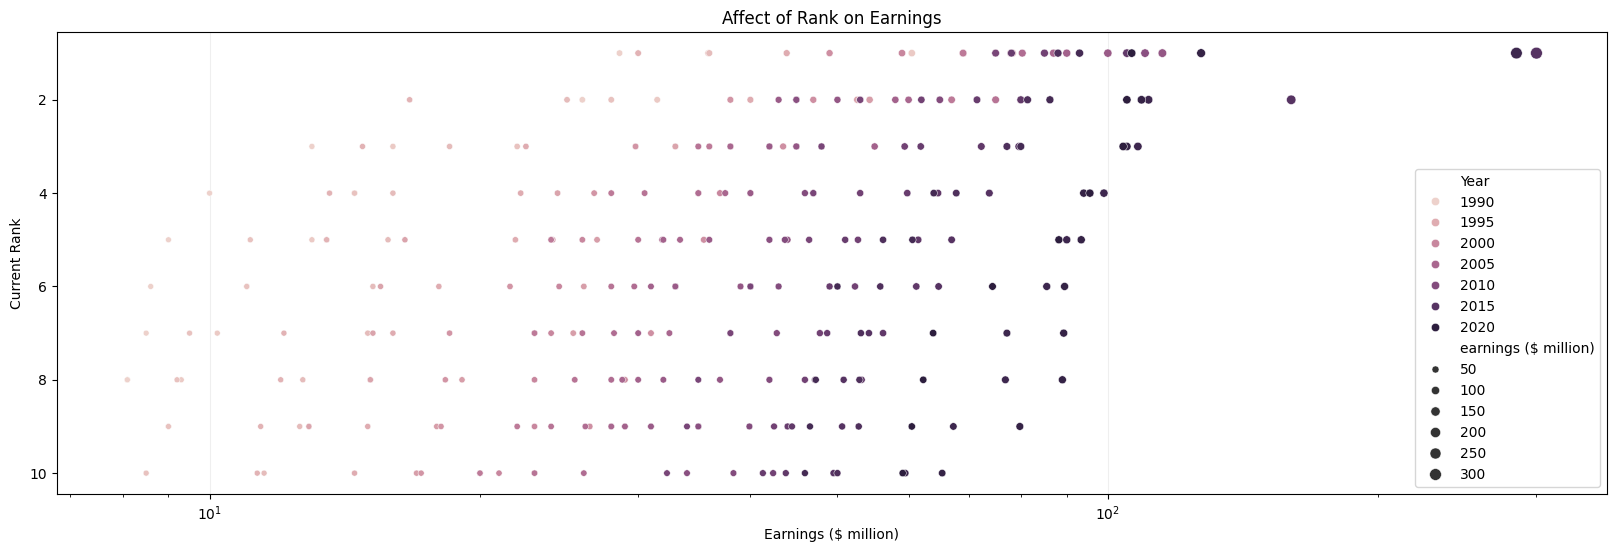

In [46]:
# Ranking vs Earnings
fig, ax = plt.subplots(figsize=(20, 6))
sns.scatterplot(
    data=df_ath,
    x='earnings ($ million)',
    y='Current Rank',
    hue='Year',
    size='earnings ($ million)'
)

# Set grid behind graph
ax.set_axisbelow(True)
ax.grid(axis='x', alpha=0.2)

# Adjust scale to better present wide variation of earnings
plt.xscale('log')

# Labels
plt.title('Affect of Rank on Earnings')
plt.xlabel('Earnings ($ million)')
plt.gca().invert_yaxis()  # Invert axis so rank #1 is on top

plt.show()

From this, we can see that the datapoints appear to cluster more at the top of the graph where the top ranks are. This suggest that higher earnings are indeed associated with higher rankings. There are 2 very clear outliers in the top right corner. They are associated with a higher ranking, but the amount of earnings are far higher. This would suggest athlete popularity or perhaps a boost in the particular sport where it got more spot light in the later years. Other outliers are those in the later years for most ranks where the athletes still earn more but for lower ranks which would suggest fame or popularity.

### Conclusion

In conclusion, it is clear that the USA did extremely well over the 30 years from 1990-2020. It had the highest distribution of atheletes accounting for 68.4% of the dataset (followed by Germany and the UK with 4.3% each), the most sports being play with the exception of soccer and F1, and also the highest total earnings per year. For all nationalities, however, the earnings steadily increased over the years.
Basketball was the most prevalent sport in this dataset accounting for 27.2% followed by Boxing (15.3%) and Gold (14.6%).  For all sports, the earnings increased over the years. For some more than others. Boxing had a peak of over 400 million dollars in 2015 and Soccer had a peak of over 300 million dollars in 2019. Peaks possibly representing increase sport or athlete popularity and awareness or just an increase in athlete earnings in that particular year.
Among the atletes, Tiger Woods had the longest streak of consequtive top rankings position spanning from 2002-2013 (except for 2012 whe Floyd Mayweather was ranked number 1). Most of the athletes who ranked number 1 at some point also did so more than once. Tiger Woods and Michael Jordan’s names appeared on this list the most (17 times) followed by Kobe Bryant (14 times), Michael Schumacher, Shaquille O'Neal and LeBron James who each appeared 13 times. They (except for Shaquille O'Neal) also appeared on the list of the top ten athletes based on total earnings with Tiger Woods being number one (earning almost 1.4 billion dollars).
In Turn, all the names that were on the list of top earning athletes, also appeared at the top of the leaderboards for their respective sports. Most of them earned well over 200 million dollars. The least prevalent sports, Baseball (2.0% of the dataset), Ice Hockey (1.3%), F1 (4.3%), Cycle (0.3%), Mixed Martial Arts (0.3%) and Motorcycle GP (1.3%), all had athletes who made less than 200 million dollars.
Lastly, the earnings of each athlete is associated with their rank. The higher the rank, the more they earn.
Overall, this analysis provides a data_driven view of the distribution of earnings across nationalities, sports and athletes. It also suggested some connections to sport and athlete popularity of the recent sport industry.


This report was written by: Melissa Bosman